# Credit Card Fraud Detection
### Objectives
* Find the best model of Credit Card Fraud Prediction
* Compare Features importance
* Resampling Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import os

# Cargar Dataset de Entrenamiento y de Prueba

In [7]:
cc_original_train_df = pd.read_csv("/fraudTrain.csv", index_col="Unnamed: 0")
cc_original_test_df = pd.read_csv("/fraudTest.csv", index_col="Unnamed: 0")

Checar la descripcion de los datos y los valores nulos del dataset de entrenamiento

In [8]:
cc_original_train_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
cc_original_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [10]:
cc_original_train_df.isnull().sum() #Count Null Value each feature

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Nota: este conjunto de datos de entrenamiento no tiene un valor nulo, todas las funciones y el objetivo tienen 1296675.

# Data Visualization
Comprobar la relación entre las características y el objetivo

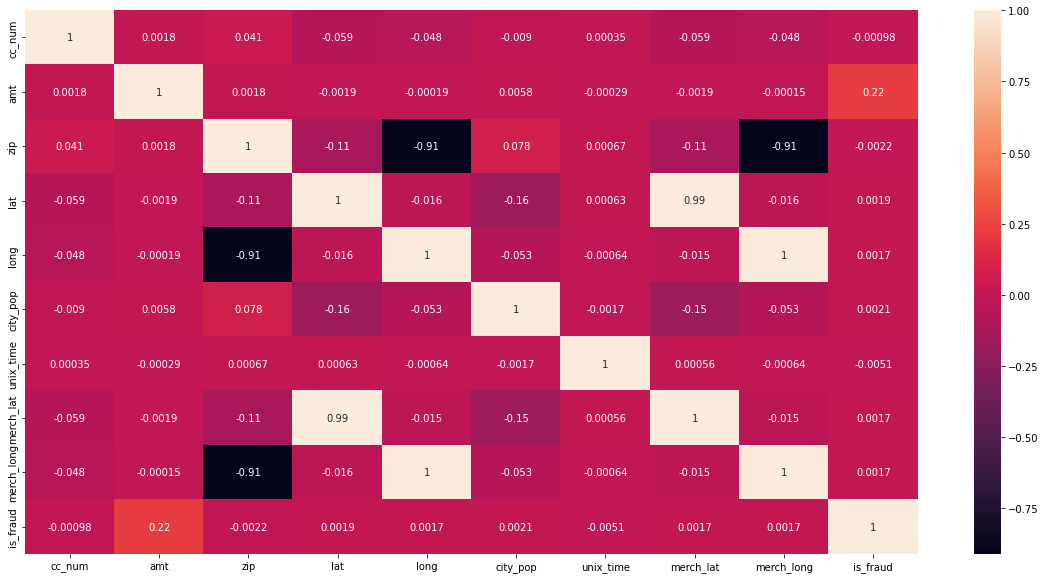

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cc_original_train_df.corr(), annot=True)
plt.show()

Nota: la cantidad del mapa de calor se ha correlacionado mucho con is_fraud

(Mapa de calor si el valor es cercano a 1 y el color es cercano al blanco, lo que significa que 2 características tienen una correlación alta)

### Preguntas
¿Quién fue estafado con la mayor cantidad y cuál es el género?
¿Cuánta cantidad que más ha sido estafada?
¿Cuál es el género que más ha sido estafado?
¿Qué tipo de categoría ha sido más estafada?

In [15]:
cc_original_train_df.loc[cc_original_train_df['is_fraud'] == 1].sort_values('amt', ascending=False).head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1262544,2020-06-08 22:14:13,3562793934111141,fraud_Kuhn LLC,shopping_pos,1376.04,Meagan,Edwards,F,10376 Bullock Rapid,Queen Anne,...,38.9456,-75.9777,777,Television production assistant,1997-04-17,9a7f96694d672499c10b6085fadecd30,1370729653,38.004592,-75.446751,1
514148,2019-08-10 22:10:23,3500969075198072,fraud_Metz-Boehm,shopping_pos,1371.81,Kenneth,Sanchez,M,0110 Ashley Forest,Tekoa,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,20cf5453224328229e06ae7b4df10302,1344636623,47.065996,-116.262297,1


### Respuestas
¿Quién fue estafado con la mayor cantidad y cuál es el género?: 
**Meagan Edwards, Mujer**
¿Cuanto es el monto que más ha sido estafado?:
**$1376.04**

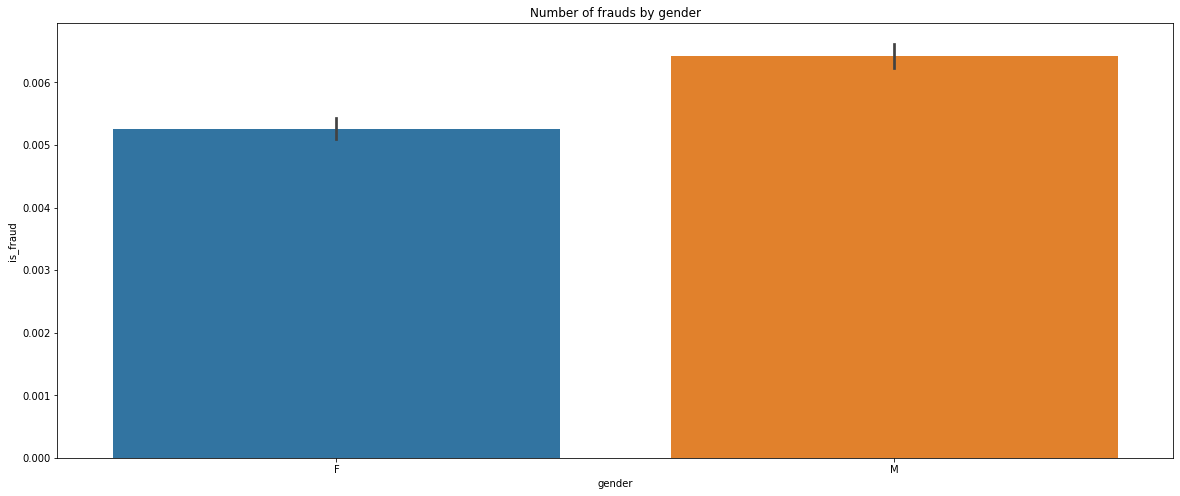

In [13]:
# Gender
plt.figure(figsize=(20,8))
plt.title('Number of frauds by gender')
sns.barplot(x="gender", y='is_fraud' ,data=cc_original_train_df)

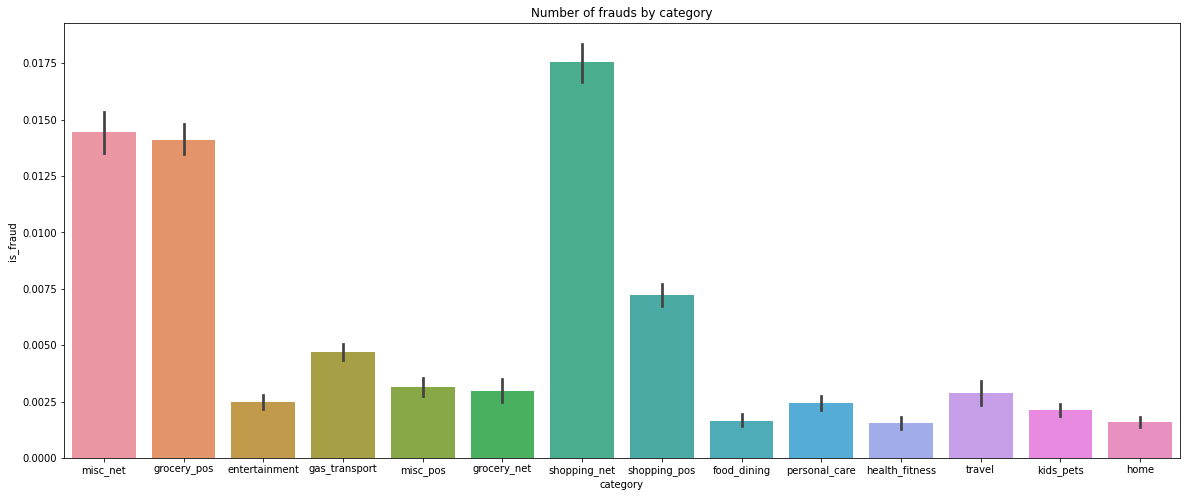

In [14]:
# Category
plt.figure(figsize=(20,8))
plt.title('Number of frauds by category')
sns.barplot(x="category", y='is_fraud' ,data=cc_original_train_df)

### Respuestas
3. ¿Cuál es el género que más ha sido estafado?:
**Masculino**
4. ¿Qué tipo de categoría ha sido más estafada?:
**shopping_net**

# Preprocesamiento
## Reducción de muestreo de datos
Use una solución de reducción de resolución porque los objetivos son datos de desequilibrio

In [16]:
print("Number of is_fraud data",cc_original_train_df['is_fraud'].value_counts())

Number of is_fraud data 0    1289169
1       7506
Name: is_fraud, dtype: int64


is_fraud = 0 has 1289169 data

is_fraud = 1 has 7506 data

Amount of is_fraud is very different, it can make overfitting

In [33]:
from sklearn.utils import resample 
df_minority = cc_original_train_df[cc_original_train_df.iloc[:,21].values==0] # .iloc[:,21] = is_fraud
df_majority = cc_original_train_df[cc_original_train_df.iloc[:,21].values==1] 
 
# Downsample majority class
df_minority_downsampled = resample(df_minority,
                                 n_samples=7506,     # to match minority class
                                 random_state=42)    # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority_downsampled, df_majority])
 
# Display new class counts
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 123118 to 1295733
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  15012 non-null  object 
 1   cc_num                 15012 non-null  int64  
 2   merchant               15012 non-null  object 
 3   category               15012 non-null  object 
 4   amt                    15012 non-null  float64
 5   first                  15012 non-null  object 
 6   last                   15012 non-null  object 
 7   gender                 15012 non-null  object 
 8   street                 15012 non-null  object 
 9   city                   15012 non-null  object 
 10  state                  15012 non-null  object 
 11  zip                    15012 non-null  int64  
 12  lat                    15012 non-null  float64
 13  long                   15012 non-null  float64
 14  city_pop               15012 non-null  int64  


In [34]:
print("Number of is_fraud data",df_downsampled['is_fraud'].value_counts())

Number of is_fraud data 0    7506
1    7506
Name: is_fraud, dtype: int64


Nota: Ahora is_fraud = 0 e is_fruad = 1 tienen cantidad = 7506 ambos

# Transformación de datos
## Fecha y hora de la transacción
Agregue nuevas columnas número_semana, número_mes, año por datos de transformación de la característica trans_date_trans_time

### Datos de entrenamiento

In [35]:
# Train data
# Change date to be date type
df_downsampled['trans_date_trans_time'] = pd.to_datetime(df_downsampled['trans_date_trans_time'])
# Create column week number
df_downsampled['week_number'] = df_downsampled['trans_date_trans_time'].dt.dayofweek
assert df_downsampled['week_number'].max() == 6
# Create column month number
df_downsampled['month_number'] = df_downsampled['trans_date_trans_time'].dt.month
assert df_downsampled['month_number'].max() == 12
# Create column year
df_downsampled['year'] = df_downsampled['trans_date_trans_time'].dt.year
df_downsampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year
123118,2019-03-10 03:24:30,30011465039817,fraud_Huels-Nolan,gas_transport,67.66,Lisa,Garcia,F,213 Gill Expressway,Chatham,...,Human resources officer,1971-10-14,6744f95a0c456529c4a35cb30a5cb396,1331349870,42.974691,-73.944930,0,6,3,2019
675160,2019-10-14 15:40:47,2288813824604479,fraud_Yost-Rogahn,personal_care,47.79,Barbara,Norman,F,6278 Stephanie Unions,New York City,...,Herbalist,1981-08-29,7c53e2c5bb6aa689753574d9f8ae623f,1350229247,41.046486,-74.132901,0,0,10,2019
133167,2019-03-14 15:21:51,2266735643685262,fraud_Roob-Okuneva,health_fitness,24.17,Carlos,Chung,M,8957 Russell Key,Grant,...,Curator,1972-07-25,0b3a94c9a2f622d2f3c3399a6cc3910b,1331738511,34.956184,-86.986784,0,3,3,2019
261154,2019-05-10 09:04:20,4384910379661778,fraud_Howe Ltd,misc_pos,51.69,Michelle,Russell,F,55505 Christy Via,Hawley,...,Naval architect,1949-04-24,35caf2d1468a377e45235274b005aa02,1336640660,46.851874,-97.269843,0,4,5,2019
111322,2019-03-04 12:54:01,2356276337669917,fraud_Mayert Group,shopping_pos,5.89,Benjamin,Harris,M,0881 Lori Pines,Chester,...,Paediatric nurse,1981-02-15,4ea34c698a6a4ad782a74a051f136aca,1330865641,38.303450,-75.346029,0,0,3,2019


### Data de Prueba

In [36]:
# Test Data
# Change date to be date type
cc_original_test_df['trans_date_trans_time'] = pd.to_datetime(cc_original_test_df['trans_date_trans_time'])
# Create column week number
cc_original_test_df['week_number'] = cc_original_test_df['trans_date_trans_time'].dt.dayofweek
assert cc_original_test_df['week_number'].max() == 6
# Create column month number
cc_original_test_df['month_number'] = cc_original_test_df['trans_date_trans_time'].dt.month
assert cc_original_test_df['month_number'].max() == 12
# Create column year
cc_original_test_df['year'] = cc_original_test_df['trans_date_trans_time'].dt.year
cc_original_test_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,6,6,2020
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,6,6,2020
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,6,6,2020
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,6,6,2020
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,6,6,2020


## Categoría (Codificación One-Hot End)
La categoría son datos nominales que no pueden funcionar con el modelo, así que cambiaré la categoría a numérica por One Hot Encoding

## Datos de entrenamiento

In [37]:
category_onehot = pd.get_dummies(df_downsampled.category, prefix='category')
df_downsampled = df_downsampled.join(category_onehot)
df_downsampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
126,2019-01-01 01:33:52,3567879740649740,fraud_Koss and Sons,gas_transport,58.79,Tanya,Williams,F,566 Megan Well,Brownville,...,0,0,0,0,0,0,0,0,0,0
159,2019-01-01 01:56:51,30442439074871,"fraud_Parisian, Schiller and Altenwerth",misc_net,14.03,Linda,Sanchez,F,6574 William Hill Apt. 375,Jermyn,...,0,0,0,0,1,0,0,0,0,0
215,2019-01-01 02:38:49,4710826438164847414,fraud_Strosin-Cruickshank,grocery_pos,128.24,Juan,Henry,M,9795 Lori Island Suite 346,Turner,...,1,0,0,0,0,0,0,0,0,0
404,2019-01-01 05:19:42,4464457352619,fraud_Vandervort-Funk,grocery_pos,124.33,Breanna,Rodriguez,F,118 Cabrera Springs Apt. 105,Lanark Village,...,1,0,0,0,0,0,0,0,0,0
727,2019-01-01 09:27:35,3554849923339851,fraud_Larson-Moen,entertainment,65.74,John,Hudson,M,886 Nicole Key,Stillwater,...,0,0,0,0,0,0,0,0,0,0


### Data Prueba

In [38]:
category_onehot_test_data = pd.get_dummies(cc_original_test_df.category, prefix='category')
cc_original_test_df = cc_original_test_df.join(category_onehot_test_data)
cc_original_test_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,0,0,0,0,0,0,1,0,0,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,0,0,0,0,0,0,1,0,0,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,0,1,0,0,0,0,0,0,0,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,0,0,0,0,0,1,0,0,0,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,0,0,0,0,0,0,0,0,0,1


## Género
Cambiar género de nominal a numérico

In [39]:
# Train data
df_downsampled['gender'] = df_downsampled['gender'].replace(['F','M'],[0,1])
# Test data
cc_original_test_df['gender'] = cc_original_test_df['gender'].replace(['F','M'],[0,1])

print('Gender of train dataset', df_downsampled['gender'].value_counts())
print('Gender of test dataset', cc_original_test_df['gender'].value_counts())

Gender of train dataset 0    7975
1    7091
Name: gender, dtype: int64
Gender of test dataset 0    304886
1    250833
Name: gender, dtype: int64


## Merchant
Convertir el campo Merchant en datos numéricos

In [40]:
# Train data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_train = df_downsampled['merchant']
df_downsampled['merchant_number'] = label_encoder.fit_transform(x_train)

# Test data
x_test = cc_original_test_df['merchant']
cc_original_test_df['merchant_number'] = label_encoder.fit_transform(x_test)

print('Merchant Number of train dataset',df_downsampled['merchant_number'])
print('Merchant Number of test dataset',cc_original_test_df['merchant_number'])

Merchant Number of train dataset 126        332
159        475
215        608
404        645
727        376
          ... 
1295710    645
1295733    332
1295801    442
1296013    300
1296098    104
Name: merchant_number, Length: 15066, dtype: int64
Merchant Number of test dataset 0         319
1         591
2         611
3         222
4         292
         ... 
555714    507
555715    264
555716    496
555717     75
555718    125
Name: merchant_number, Length: 555719, dtype: int64


## Años
Encuentra la edad desde la fecha de nacimiento de los datos

In [42]:
from datetime import date
def calculate_age(row):
    today = date.today()
    return today.year - row['dob'].year - ((today.month, today.day) < (row['dob'].month, row['dob'].day))

# Train data
df_downsampled['dob'] = pd.to_datetime(df_downsampled['dob'])
df_downsampled['age'] = df_downsampled['dob']
df_downsampled['age'] = df_downsampled.apply (lambda row: calculate_age(row), axis=1)

# Test data
cc_original_test_df['dob'] = pd.to_datetime(cc_original_test_df['dob'])
cc_original_test_df['age'] = cc_original_test_df['dob']
cc_original_test_df['age'] = cc_original_test_df.apply (lambda row: calculate_age(row), axis=1)

print('Age of train dataset', df_downsampled['age'].head(3))
print('Age of test dataset', cc_original_test_df['age'].head(3))

Age of train dataset 126    63
159    40
215    58
Name: age, dtype: int64
Age of test dataset 0    54
1    32
2    51
Name: age, dtype: int64


### Job
Convert job to be numerical data

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Train data
x_train = df_downsampled['job']
df_downsampled['job_number'] = label_encoder.fit_transform(x_train)
print(df_downsampled['job_number'])

# Test data
x_test = cc_original_test_df['job']
cc_original_test_df['job_number'] = label_encoder.fit_transform(x_test)
print(cc_original_test_df['job_number'])

126        354
159        478
215        205
404        459
727         58
          ... 
1295710    423
1295733    222
1295801    155
1296013     70
1296098     86
Name: job_number, Length: 15066, dtype: int64
0         275
1         392
2         259
3         407
4         196
         ... 
555714    460
555715    198
555716    294
555717     58
555718    276
Name: job_number, Length: 555719, dtype: int64


# Seleccionar datos

Para funciones seleccionadas, me gustaría hacer 2 experimentos: ExtraTreesClassifier, .abs().nlargest(), porque me gustaría encontrar la mejor moneda y la mejor predicción

In [41]:
# Unselect converted data
select_data = df_downsampled
select_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'week_number', 'month_number', 'year',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'merchant_number'],
      dtype='object')

In [44]:
select_data = select_data[['cc_num',
       'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'age', 'job_number',
       'week_number', 'month_number', 'year', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'merchant_number','is_fraud']]
select_data.head()

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_number,is_fraud
126,3567879740649740,58.79,0,13615,44.0577,-76.0196,1271,1325381632,44.015435,-76.027125,...,0,0,0,0,0,0,0,0,332,0
159,30442439074871,14.03,0,18433,41.5744,-75.5881,6508,1325383011,40.868184,-76.283066,...,0,0,1,0,0,0,0,0,475,0
215,4710826438164847414,128.24,1,59542,48.8328,-108.3961,192,1325385529,49.176720,-108.757243,...,0,0,0,0,0,0,0,0,608,0
404,4464457352619,124.33,0,32323,29.8826,-84.5964,217,1325395182,30.773425,-83.837856,...,0,0,0,0,0,0,0,0,645,0
727,3554849923339851,65.74,1,74074,36.1043,-97.0609,55345,1325410055,35.359894,-97.202209,...,0,0,0,0,0,0,0,0,376,0


## ExtraTreesClassifier

[1.46461047e-03 7.98407234e-02 3.63659506e-03 1.54007547e-03
 1.48290919e-03 1.44571992e-03 1.53235804e-03 2.27405878e-03
 1.56718514e-03 1.45419600e-03 2.90490140e-03 1.57809224e-03
 1.55901027e-03 2.91745573e-03 5.74093647e-04 1.47195429e-03
 2.96969668e-03 1.02556823e-03 4.47237696e-04 1.42565510e-02
 3.79471753e-03 6.87226275e-03 3.79618030e-03 8.28065165e-03
 4.58156981e-04 2.32458576e-03 2.25491691e-02 1.77960028e-03
 4.36896895e-04 1.39916584e-03 8.22365620e-01]


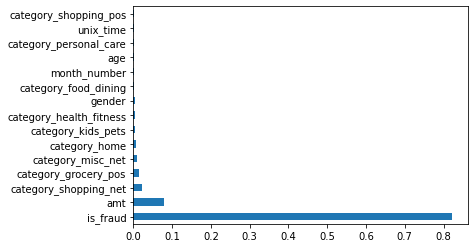

In [45]:
X = select_data.iloc[:,0:31]  #independent columns
y = select_data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## nlargest

In [46]:
print(select_data.corr().abs().nlargest(15, 'is_fraud').index)

Index(['is_fraud', 'amt', 'category_shopping_net', 'category_grocery_pos',
       'category_home', 'category_misc_net', 'category_kids_pets',
       'category_health_fitness', 'category_food_dining',
       'category_personal_care', 'month_number', 'category_entertainment',
       'age', 'category_misc_pos', 'gender'],
      dtype='object')


In [47]:
#Select Train Data
select_data_train_extra_tree = df_downsampled[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos','is_fraud']]

select_data_train_abs_nlargest = df_downsampled[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender','is_fraud']]

In [48]:
#Select Test Data
select_data_test_extra_tree = cc_original_test_df[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos','is_fraud']]

select_data_test_abs_nlargest = cc_original_test_df[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender','is_fraud']]

In [49]:
# Prepare X_train y_train
X_train_extra_tree = select_data_train_extra_tree[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos']]
y_train_extra_tree = select_data_train_extra_tree['is_fraud']

X_train_abs_nlargest = select_data_train_abs_nlargest[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender']]
y_train_abs_nlargest = select_data_train_abs_nlargest['is_fraud']

In [50]:
# Prepare X_test y_test
X_test_extra_tree = select_data_test_extra_tree[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos']]
y_test_extra_tree = select_data_test_extra_tree['is_fraud']

X_test_abs_nlargest = select_data_test_abs_nlargest[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender']]
y_test_abs_nlargest = select_data_test_abs_nlargest['is_fraud']

# Scaler Data

In [51]:
from sklearn import preprocessing

### Scaler Train Data

In [52]:
# Scale X_train
# Extra Tree
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_train_extra_tree)
X_train_extra_tree_scaler = pd.DataFrame(newValue, columns=X_train_extra_tree.columns)
X_train_extra_tree_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,gender,age,month_number,category_food_dining,unix_time,category_personal_care,category_shopping_pos
0,0.003994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5750,0.000000,0.0,0.000000,0.0,0.0
1,0.000900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.2875,0.000000,0.0,0.000030,0.0,0.0
2,0.008795,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5125,0.000000,0.0,0.000084,0.0,0.0
3,0.008524,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1875,0.000000,0.0,0.000292,0.0,0.0
4,0.004474,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7000,0.000000,0.0,0.000612,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061,0.004588,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.3625,0.454545,0.0,0.999750,0.0,0.0
15062,0.000635,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1250,0.454545,0.0,0.999764,0.0,0.0
15063,0.006693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.3875,0.454545,0.0,0.999806,0.0,0.0
15064,0.005938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.3500,0.454545,0.0,0.999947,0.0,0.0


In [53]:
# Abs
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_train_abs_nlargest)
X_train_abs_nlargest_scaler = pd.DataFrame(newValue, columns=X_train_abs_nlargest.columns)
X_train_abs_nlargest_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,category_food_dining,category_personal_care,month_number,category_entertainment,age,category_misc_pos,gender
0,0.003994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5750,0.0,0.0
1,0.000900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.2875,0.0,0.0
2,0.008795,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5125,0.0,1.0
3,0.008524,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.1875,0.0,0.0
4,0.004474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.7000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061,0.004588,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.3625,0.0,1.0
15062,0.000635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.1250,0.0,1.0
15063,0.006693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.3875,0.0,0.0
15064,0.005938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.454545,0.0,0.3500,0.0,0.0


### Scaler Test Data

In [54]:
# Scale X_test
# Extra Tree
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_test_extra_tree)
X_test_extra_tree_scaler = pd.DataFrame(newValue, columns=X_test_extra_tree.columns)
X_test_extra_tree_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,gender,age,month_number,category_food_dining,unix_time,category_personal_care,category_shopping_pos
0,0.000082,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4625,0.0,0.0,0.000000e+00,1.0,0.0
1,0.001267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1875,0.0,0.0,4.785402e-07,1.0,0.0
2,0.001769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4250,0.0,0.0,1.674891e-06,0.0,0.0
3,0.002594,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2125,0.0,0.0,2.990876e-06,0.0,0.0
4,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6125,0.0,0.0,3.110511e-06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.001879,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.4875,1.0,0.0,9.999984e-01,0.0,0.0
555715,0.004868,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0625,1.0,0.0,9.999985e-01,0.0,0.0
555716,0.003772,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.2875,1.0,0.0,9.999989e-01,0.0,0.0
555717,0.000307,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4875,1.0,0.0,9.999994e-01,0.0,0.0


In [55]:
# nlargest
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_test_abs_nlargest)
X_test_abs_nlargest_scaler = pd.DataFrame(newValue, columns=X_test_abs_nlargest.columns)
X_test_abs_nlargest_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,category_food_dining,category_personal_care,month_number,category_entertainment,age,category_misc_pos,gender
0,0.000082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.4625,0.0,1.0
1,0.001267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.1875,0.0,0.0
2,0.001769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.4250,0.0,0.0
3,0.002594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2125,1.0,1.0
4,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6125,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.001879,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.4875,0.0,1.0
555715,0.004868,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0625,0.0,1.0
555716,0.003772,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.2875,0.0,0.0
555717,0.000307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4875,0.0,1.0


# Modelo
## LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
# Extra Tree
model_ext = LogisticRegression(random_state=42)
model_ext.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest
model_nr = LogisticRegression(random_state=42)
model_nr.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

LogisticRegression(random_state=42)

In [58]:
# Extra Tree - Predict
y_pred_extra_tree_scaler = model_ext.predict(X_test_extra_tree_scaler)

# nlargest - Predict
y_pred_abs_nlargest_scaler = model_nr.predict(X_test_abs_nlargest_scaler)

In [59]:
# Extra Tree - Confusion matrix
print("Select Data By Extra Tree")
print(pd.DataFrame(confusion_matrix(y_test_extra_tree,y_pred_extra_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

# nlargest - Confusion matrix
print("Select Data By Abs nlargest")
print(pd.DataFrame(confusion_matrix(y_test_abs_nlargest,y_pred_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

Select Data By Extra Tree
                 Predicted Positive  Predicted Nagative
Actual Positive              501832               51742
Actual Negative                 656                1489
Select Data By Abs nlargest
                 Predicted Positive  Predicted Nagative
Actual Positive              499144               54430
Actual Negative                 659                1486


In [60]:
# Extra Tree - Classification Report
print("Classification report (Select Data By Extra Tree)")
print(classification_report(y_test_extra_tree, y_pred_extra_tree_scaler))

# nlargest - Classification Report
print("Classification report (Select Data By Abs nlargest)")
print(classification_report(y_test_abs_nlargest, y_pred_abs_nlargest_scaler))

Classification report (Select Data By Extra Tree)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.03      0.69      0.05      2145

    accuracy                           0.91    555719
   macro avg       0.51      0.80      0.50    555719
weighted avg       0.99      0.91      0.95    555719

Classification report (Select Data By Abs nlargest)
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    553574
           1       0.03      0.69      0.05      2145

    accuracy                           0.90    555719
   macro avg       0.51      0.80      0.50    555719
weighted avg       0.99      0.90      0.94    555719



## Árbol de Desición

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=42)

# Extra Tree - Fit Model
dt_clf.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest - Fit Model
dt_clf.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [62]:
#Extra Tree - Confusion matrix
print("Confusion Matrix(Select Data By Extra Tree)")
pred_test_extrea_tree_scaler = dt_clf.predict(X_test_extra_tree_scaler)
pd.DataFrame(confusion_matrix(y_test_extra_tree,pred_test_extrea_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

Confusion Matrix(Select Data By Extra Tree)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- category_shopping_pos
- unix_time
Feature names seen at fit time, yet now missing:
- category_entertainment
- category_misc_pos

  warnings.warn(message, FutureWarning)


,Predicted Positive,Predicted Nagative
Actual Positive,523011,30563
Actual Negative,1722,423


In [63]:
# nlargest - Confusion matrix
print("Confusion Matrix(Select Data By Abs nlargest)")
pred_test_abs_nlargest_scaler = dt_clf.predict(X_test_abs_nlargest_scaler)
pd.DataFrame(confusion_matrix(y_test_abs_nlargest,pred_test_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

Confusion Matrix(Select Data By Abs nlargest)


,Predicted Positive,Predicted Nagative
Actual Positive,527117,26457
Actual Negative,1631,514


In [64]:
# Extra Tree - Classification report
print("Classification report (Select Data By Extra Tree)")
print(classification_report(y_test_extra_tree, pred_test_extrea_tree_scaler))


# nlargest - Classification report
print("Classification report (Select Data By nlargest)")
print(classification_report(y_test_abs_nlargest, pred_test_abs_nlargest_scaler))

Classification report (Select Data By Extra Tree)
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.01      0.20      0.03      2145

    accuracy                           0.94    555719
   macro avg       0.51      0.57      0.50    555719
weighted avg       0.99      0.94      0.97    555719

Classification report (Select Data By nlargest)
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.02      0.24      0.04      2145

    accuracy                           0.95    555719
   macro avg       0.51      0.60      0.50    555719
weighted avg       0.99      0.95      0.97    555719



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
# Extra Tree
model_ext = LogisticRegression(random_state=42)
model_ext.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest
model_nr = LogisticRegression(random_state=42)
model_nr.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

LogisticRegression(random_state=42)

In [66]:
# Extra Tree - Predict
y_pred_extra_tree_scaler = model_ext.predict(X_test_extra_tree_scaler)

# nlargest - Predict
y_pred_abs_nlargest_scaler = model_nr.predict(X_test_abs_nlargest_scaler)

In [67]:
# Extra Tree - Confusion matrix
print("Select Data By Extra Tree")
print(pd.DataFrame(confusion_matrix(y_test_extra_tree,y_pred_extra_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

# nlargest - Confusion matrix
print("Select Data By Abs nlargest")
print(pd.DataFrame(confusion_matrix(y_test_abs_nlargest,y_pred_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

Select Data By Extra Tree
                 Predicted Positive  Predicted Nagative
Actual Positive              501832               51742
Actual Negative                 656                1489
Select Data By Abs nlargest
                 Predicted Positive  Predicted Nagative
Actual Positive              499144               54430
Actual Negative                 659                1486


In [68]:
# Extra Tree - Classification Report
print("Classification report (Select Data By Extra Tree)")
print(classification_report(y_test_extra_tree, y_pred_extra_tree_scaler))

# nlargest - Classification Report
print("Classification report (Select Data By Abs nlargest)")
print(classification_report(y_test_abs_nlargest, y_pred_abs_nlargest_scaler))

Classification report (Select Data By Extra Tree)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.03      0.69      0.05      2145

    accuracy                           0.91    555719
   macro avg       0.51      0.80      0.50    555719
weighted avg       0.99      0.91      0.95    555719

Classification report (Select Data By Abs nlargest)
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    553574
           1       0.03      0.69      0.05      2145

    accuracy                           0.90    555719
   macro avg       0.51      0.80      0.50    555719
weighted avg       0.99      0.90      0.94    555719



## Conclusion
The best accuracy from 4 models is a Decision Tree and Selection data is nlargest has 95% 
and has the best True Positive but for True Negative has value less than LogisticRegression but f1-score has a little different. So, Decision Tree and Selection data is nlargest medel is the best in this project.
